In [43]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")

In [44]:
!ls

Untitled.ipynb     data               model_parser.ipynb tmp.csv
check_result.ipynb data_class.ipynb   outputs


# load メルカリデータ

In [45]:
df = pd.read_csv("./data/mercari-imac.csv")
df.columns = ["name", "price", "url"]
df = df[["name", "price"]]
df

,name,price
0,"iMac Retina 5K 27インチ Late2014 16GB i7の画像 50,000円",50000
1,"【最高スペックCPU】iMac 27インチ Core i7の画像 54,000円",54000
2,"iMac 21.5 2015年購入 DVDドライブ付きの画像 79,800円",79800
3,"iMac Retina 4K, 21.5インチ/i7/16GB/SSD1TBの画像 91,800円",91800
4,"ジャンク品 Apple iMac (27-inch, Late 2013)の画像 26,000円",26000
...,...,...
1416,"iMac 20インチの画像 29,800円",29800
1417,"iMac 24インチ 超美品 core2の画像 40,000円",40000
1418,"iMac2.15インチほとんど未使用税込40000円最終値下げですの画像 40,000円",40000
1419,"i macの画像 30,000円",30000


In [46]:
df

,name,price
0,"iMac Retina 5K 27インチ Late2014 16GB i7の画像 50,000円",50000
1,"【最高スペックCPU】iMac 27インチ Core i7の画像 54,000円",54000
2,"iMac 21.5 2015年購入 DVDドライブ付きの画像 79,800円",79800
3,"iMac Retina 4K, 21.5インチ/i7/16GB/SSD1TBの画像 91,800円",91800
4,"ジャンク品 Apple iMac (27-inch, Late 2013)の画像 26,000円",26000
...,...,...
1416,"iMac 20インチの画像 29,800円",29800
1417,"iMac 24インチ 超美品 core2の画像 40,000円",40000
1418,"iMac2.15インチほとんど未使用税込40000円最終値下げですの画像 40,000円",40000
1419,"i macの画像 30,000円",30000


<AxesSubplot:>

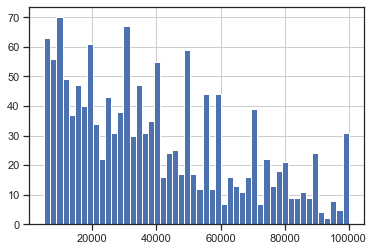

In [47]:
df.price.hist(bins=50)

In [48]:
import re
keywords = []
for r in df.name:
    r = r.replace("【", " ").replace("】", " ").replace("の画像", " ")
    r = r.replace(",", " ")
    r = r.replace("[", " ").replace("]", " ").replace("インチ", "inch")
    r = re.sub(',|、|。', ' ', r)
    r = r.lower()
    ws = [s.strip() for s in r.split()]
    keywords += ws
keywords
pd.Series(keywords).unique()

array(['imac', 'retina', '5k', ..., '初期', 'ステッカー付き',
       'imac2.15inchほとんど未使用税込40000円最終値下げです'], dtype=object)

In [49]:
x  = "20インチ Apple iMac デスクトップPC (21.5-inch Mid 2010)の画像 A2021 16.."
print(x)
x = x.lower()
re.findall("20\d\d", x)
re.findall("20\d\d", x)
re.findall("a20\d\d", x)

20インチ Apple iMac デスクトップPC (21.5-inch Mid 2010)の画像 A2021 16..


['a2021']

In [50]:
def parse_inch(x):
    x = x.lower()
    import re
    x = re.sub('20..', '【---】 ', x)
    x = re.sub('a1...', '【---】 ', x)
    x = re.sub('a2...', '【---】 ', x)

    for y in (20, 21.5, 24, 27):
        if str(y) in x : 
            return y
    
    return None

df["size"] = df["name"].apply(parse_inch)
df.sample(20)

,name,price,size
854,"iMac (27-inch, Late 2012) i7 中古美品 動作確認済みの画像 43...",43000,27.0
915,"Apple純正 高速SSD256GB 3の画像 6,700円",6700,NaN
1304,"Apple imac MB950j/a 21.5 windows10 中古の画像 30,000円",30000,21.5
858,"iMac 21.5インチの画像 16,999円",16999,21.5
38,Apple iMac 27 i5/メモリ16GB/SSD121GB＋HDD3TBの画像 50...,50200,27.0
696,"iMac mid 2010 27-inch i7 SSDの画像 49,900円",49900,27.0
1,"【最高スペックCPU】iMac 27インチ Core i7の画像 54,000円",54000,27.0
540,"iMac27 i5 16GB 128gbSSD 1TBSATALate2013の画像 40,...",40000,27.0
1377,"iMacの画像 55,800円",55800,NaN
1404,"iMacのパソコン本体と付属品の画像 30,000円",30000,NaN


In [51]:
x = " ".join(keywords)
s = re.findall(r"\d+(?:\.\d+)?ghz", x.lower())
print(s)

def parse_cpu(x):
    x = x.lower()
    s = re.findall(r"\d+(?:\.\d+)?ghz", x.lower())
    if len(s) == 0:
        return None
    elif len(s) == 1:
        return s[0]
    else:
        return " ".join(s)

df["cpu_GHz"] = df["name"].apply(parse_cpu)
df.sort_values("cpu_GHz")

['3.5ghz', '3.5ghz', '3.06ghz', '3.6ghz', '3.2ghz', '2.4ghz', '2.7ghz', '2.5ghz', '2.66ghz', '2.7ghz', '3.06ghz', '3.0ghz', '3.5ghz', '2.5ghz', '2.66ghz', '2.8ghz', '2.8ghz', '2.7ghz', '3.2ghz', '2.7ghz', '2.3ghz', '2.8ghz', '2.7ghz', '2.7ghz', '2.7ghz', '3.6ghz', '3.6ghz', '2.66ghz', '1.8ghz', '3.06ghz', '3ghz', '3.06ghz', '2.8ghz', '4ghz', '2.4ghz', '1ghz', '2.8ghz', '2.7ghz', '2.4ghz', '2.8ghz', '2.0ghz', '2.4ghz', '2.4ghz', '2.4ghz', '3.06ghz', '2.8ghz', '2ghz', '2.66ghz']


,name,price,size,cpu_GHz
1084,"iMac 2006 core duo 1.8GHZの画像 9,876円",9876,NaN,1.8ghz
1213,"APPLE iMac G4 17inch 1GHz M8935J/Aの画像 95,000円",95000,NaN,1ghz
1291,"iMacA1224core2duo-2.0GHZOSELCAPITAN 20の画像 16,000円",16000,NaN,2.0ghz
745,"iMac (21.5-inch, 2017)2.3GHz Core i5 ⑤の画像 58,800円",58800,21.5,2.3ghz
1358,"APPLE imac a1224 2.4GHZ 中古動作品 キーボードマウスの画像 20,500円",20500,NaN,2.4ghz
...,...,...,...,...
1416,"iMac 20インチの画像 29,800円",29800,NaN,None
1417,"iMac 24インチ 超美品 core2の画像 40,000円",40000,24.0,None
1418,"iMac2.15インチほとんど未使用税込40000円最終値下げですの画像 40,000円",40000,NaN,None
1419,"i macの画像 30,000円",30000,NaN,None


In [52]:
def parse_cpu(x):
    x = x.lower()
    for y in ("i3", "i5", "i7", "duo"):
        if str(y) in x : 
            return y
    
    return None

df["cpu"] = df["name"].apply(parse_cpu)
df.sample(30).sort_values("cpu")

,name,price,size,cpu_GHz,cpu
1405,"IMAC 24inch icore2duo2.8GHZ ４G Windows7の画像 30,...",30000,24.0,2.8ghz,duo
298,"iMac 21.5インチ 2.7GHz Core i5の画像 25,450円",25450,21.5,2.7ghz,i5
697,"IMAC2015/21.5inch 4K/i5/16GB/1TB Fusionの画像 52,...",52000,21.5,None,i5
673,"APPLE iMac IMAC MC813J/A 2011 Core i7の画像 19,999円",19999,NaN,None,i7
1035,"iMac 21.5 Mid 2010の画像 29,800円",29800,21.5,None,None
495,"iMac2017 4K メモリ増設、HDD強化 BTO仕様の画像 67,800円",67800,NaN,None,None
231,"【ジャンク】i Mac 27 2010 ＋ケーブル 純正の画像 9,999円",9999,27.0,None,None
704,"Apple iMac 27インチ Retina ディスプレイモデル MXW…の画像 100,...",100000,27.0,None,None
687,"APPLE iMac IMAC MB418J/Aの画像 9,200円",9200,NaN,None,None
161,"iMac 21.5インチ Retina2017の画像 59,990円",59990,21.5,None,None


In [53]:
def parse_mem(x):
    s = re.findall(r"\d+(?:\.\d+)?gb", x.lower())
    s = [float(a.replace("gb", "")) for a in s]
    s.sort(reverse=True)
    for GB in s:
        if float(GB) < 100:
            return GB
        
df["mem"] = df["name"].apply(parse_mem)
df.sample(100).sort_values("mem")

,name,price,size,cpu_GHz,cpu,mem
30,"iMac 2012 27インチ FusionDrive1TB メモリ8GBの画像 21,500円",21500,27.0,None,None,8.0
328,"iMac 27インチ i5 late2013 1TB 8GBの画像 35,000円",35000,27.0,None,i5,8.0
432,"iMac 21.5インチLate2012 メモリ8GBの画像 21,000円",21000,21.5,None,None,8.0
645,"iMac/27inch 5K/i5/8GB/1TB Fusion/Officeの画像 62,...",62000,27.0,None,i5,8.0
598,iMac2017/21inch 4K/i5/8GB/1TB/Office2021の画像 53...,53000,NaN,None,i5,8.0
...,...,...,...,...,...,...
77,"21.5インチiMac Retina 4Kディスプレイモデルの画像 65,800円",65800,21.5,None,None,NaN
596,"iMac 27インチ 2011年製 美品の画像 20,000円",20000,27.0,None,None,NaN
1365,"APPLE imac intel 17インチ動作良好 マウスキーボードの画像 10,400円",10400,NaN,None,None,NaN
51,美品 Apple iMac Retina 5K 27inch Late 2014の画像 88...,88888,27.0,None,None,NaN


In [54]:
x = " ".join(keywords)
s = re.findall(r"\d+(?:\.\d+)?gb", x.lower())
print(s)



def parse_vol(x):
    s = re.findall(r"\d+(?:\.\d+)?gb", x.lower())
    for m in s:
        GB = m.replace("gb", "")
        if float(GB) > 100:
            # hdd
            return GB
        
df["volume"] = df["name"].apply(parse_vol)
df.sample(100).sort_values("volume")

['16gb', '16gb', '320gb', '4gb', '24gb', '480gb', '16gb', '32gb', '8gb', '16gb', '16gb', '16gb', '121gb', '8gb', '24gb', '8gb', '32gb', '20gb', '16gb', '32gb', '16gb', '8gb', '256gb', '16gb', '480gb', '8gb', '32gb', '240gb', '16gb', '256gb', '4gb', '16gb', '16gb', '8gb', '16gb', '512gb', '250gb', '8gb', '256gb', '16gb', '32gb', '16gb', '8gb', '8gb', '240gb', '8gb', '960gb', '８gb', '8gb', '20gb', '12gb', '32gb', '4gb', '24gb', '16gb', '8gb', '8gb', '512gb', '32gb', '8gb', '16gb', '8gb', '8gb', '12gb', '8gb', '8gb', '32gb', '128gb', '24gb', '16gb', '8gb', '16gb', '128gb', '32gb', '8gb', '32gb', '16gb', '32gb', '12gb', '128gb', '16gb', '8gb', '8gb', '16gb', '500gb', '512gb', '12gb', '8gb', '8gb', '24gb', '256gb', '16gb', '250gb', '8gb', '8gb', '8gb', '500gb', '256gb', '14gb', '480gb', '14gb', '8gb', '512gb', '8gb', '256gb', '8gb', '16gb', '256gb', '40gb', '512gb', '16gb', '4gb', '640gb', '32gb', '8gb', '1000.2gb', '8gb', '256gb', '24gb', '16gb', '240gb', '16gb', '8gb', '256gb', '512gb', '

,name,price,size,cpu_GHz,cpu,mem,volume
878,"アップル IMAC CI5 21.5インチ 8GB 1000GB 2015年の画像 42,000円",42000,21.5,None,i5,8.0,1000
993,"【美品】iMac 21.5inch（メモリ12GB/HD500GB）の画像 37,900円",37900,21.5,None,None,12.0,500
112,"iMac 21.5 Retina 4K 1TB 2019の画像 67,000円",67000,21.5,None,None,NaN,None
379,"iMacの画像 63,500円",63500,NaN,None,None,NaN,None
684,"Apple iMac late2015 27inch 5K 1TB24GBの画像 75,000円",75000,24.0,None,None,24.0,None
...,...,...,...,...,...,...,...
732,完動品 Apple iMac 21.5インチ ディスプレイ リサイクルシール付きの画像 33...,33333,21.5,None,None,NaN,None
93,"iMac VESA 27inch 5K Corei7 32GB SSD1TBの画像 99,990円",99990,27.0,None,i7,32.0,None
819,"iMac(21.5インチ,Late2015) i5 第5世代 8GBの画像 30,000円",30000,21.5,None,i5,8.0,None
1112,"iMacの画像 8,500円",8500,NaN,None,None,NaN,None


In [55]:

def parse_ssd(x):
    return str("ssd") in x.lower()

df["ssd"] = df["name"].apply(parse_ssd)
df.sample(100).sort_values("ssd")

,name,price,size,cpu_GHz,cpu,mem,volume,ssd
676,"iMac Late 2012 21.5inchの画像 34,400円",34400,21.5,None,None,NaN,None,False
165,"iMac 21.5inch Mid2011の画像 19,800円",19800,21.5,None,None,NaN,None,False
1264,"Apple iMac 新聞折込チラシ 朝日新聞の画像 30,000円",30000,NaN,None,None,NaN,None,False
483,"Magic Keyboard・mouse 18日までの画像 10,500円",10500,NaN,None,None,NaN,None,False
1268,"iMac 27インチの画像 55,000円",55000,27.0,None,None,NaN,None,False
...,...,...,...,...,...,...,...,...
416,"iMac 2015 21.5-inch SSD 256GB メモリ 16GBの画像 41,800円",41800,21.5,None,None,16.0,256,True
186,カスタムiMac (27インチ) SSD 240GB/i5 3.2Ghz/8GBの画像 40...,40999,24.0,3.2ghz,i5,8.0,240,True
365,"iMac 2008 20inc SSD内蔵 完動品の画像 14,200円",14200,NaN,None,None,NaN,None,True
523,Macbook Pro 13インチCore i5Ram 8Gb SSD256Gbの画像 99...,99990,NaN,None,i5,8.0,256,True


In [56]:
def parse_年式(x):
    for y in range(2001, 2030):
        if str(y) in x : 
            return int(y)
    
    return None

df["year"] = df["name"].apply(parse_年式)
df.sample(10)

,name,price,size,cpu_GHz,cpu,mem,volume,ssd,year
1316,"iMac 21.5inchの画像 59,700円",59700,21.5,None,None,NaN,None,False,NaN
426,"iMac 21.5インチ Late 2009の画像 33,900円",33900,21.5,None,None,NaN,None,False,2009.0
684,"Apple iMac late2015 27inch 5K 1TB24GBの画像 75,000円",75000,24.0,None,None,24.0,None,False,2015.0
314,"I MAC 2010 21.5インチ core i3 220819-2の画像 6,500円",6500,21.5,None,i3,NaN,None,False,2010.0
339,"【中古】APPLE iMac IMAC ME086J/Aの画像 19,800円",19800,NaN,None,None,NaN,None,False,NaN
1153,"iMac (27-inch,Late 2013)の画像 72,000円",72000,27.0,None,None,NaN,None,False,2013.0
1131,"【Apple】iMac21.5インチ Late2012の画像 67,000円",67000,21.5,None,None,NaN,None,False,2012.0
1248,"【未使用】★値下げ アップル純正キーボード&マウスの画像 12,000円",12000,NaN,None,None,NaN,None,False,NaN
1210,"Apple アップル iMac 20の画像 10,000円",10000,NaN,None,None,NaN,None,False,NaN
1026,"【美品】iMac 21.5inch（メモリ12GB/HD500GB）の画像 39,999円",39999,21.5,None,None,12.0,500,False,NaN


In [64]:
df["junk"] = df["name"].str.contains("ジャンク")
df

,name,price,size,cpu_GHz,cpu,mem,volume,ssd,year,ジャンク,junk
0,"iMac Retina 5K 27インチ Late2014 16GB i7の画像 50,000円",50000,27.0,None,i7,16.0,None,False,2014.0,False,False
1,"【最高スペックCPU】iMac 27インチ Core i7の画像 54,000円",54000,27.0,None,i7,NaN,None,False,NaN,False,False
2,"iMac 21.5 2015年購入 DVDドライブ付きの画像 79,800円",79800,21.5,None,None,NaN,None,False,2015.0,False,False
3,"iMac Retina 4K, 21.5インチ/i7/16GB/SSD1TBの画像 91,800円",91800,21.5,None,i7,16.0,None,True,NaN,False,False
4,"ジャンク品 Apple iMac (27-inch, Late 2013)の画像 26,000円",26000,27.0,None,None,NaN,None,False,2013.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...
1416,"iMac 20インチの画像 29,800円",29800,NaN,None,None,NaN,None,False,NaN,False,False
1417,"iMac 24インチ 超美品 core2の画像 40,000円",40000,24.0,None,None,NaN,None,False,NaN,False,False
1418,"iMac2.15インチほとんど未使用税込40000円最終値下げですの画像 40,000円",40000,NaN,None,None,NaN,None,False,NaN,False,False
1419,"i macの画像 30,000円",30000,NaN,None,None,NaN,None,False,NaN,False,False


In [65]:
df

,name,price,size,cpu_GHz,cpu,mem,volume,ssd,year,ジャンク,junk
0,"iMac Retina 5K 27インチ Late2014 16GB i7の画像 50,000円",50000,27.0,None,i7,16.0,None,False,2014.0,False,False
1,"【最高スペックCPU】iMac 27インチ Core i7の画像 54,000円",54000,27.0,None,i7,NaN,None,False,NaN,False,False
2,"iMac 21.5 2015年購入 DVDドライブ付きの画像 79,800円",79800,21.5,None,None,NaN,None,False,2015.0,False,False
3,"iMac Retina 4K, 21.5インチ/i7/16GB/SSD1TBの画像 91,800円",91800,21.5,None,i7,16.0,None,True,NaN,False,False
4,"ジャンク品 Apple iMac (27-inch, Late 2013)の画像 26,000円",26000,27.0,None,None,NaN,None,False,2013.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...
1416,"iMac 20インチの画像 29,800円",29800,NaN,None,None,NaN,None,False,NaN,False,False
1417,"iMac 24インチ 超美品 core2の画像 40,000円",40000,24.0,None,None,NaN,None,False,NaN,False,False
1418,"iMac2.15インチほとんど未使用税込40000円最終値下げですの画像 40,000円",40000,NaN,None,None,NaN,None,False,NaN,False,False
1419,"i macの画像 30,000円",30000,NaN,None,None,NaN,None,False,NaN,False,False


# 年代別の価格相場

 - 2016, 2018, 2020, 2021が少ない

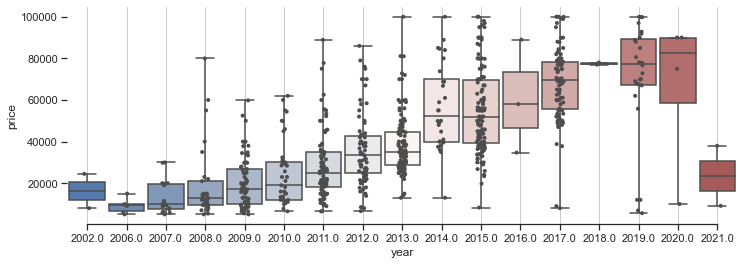

In [80]:
ax = plt.subplots(figsize=(12, 4))
ax = sns.boxplot(x="year", y="price", data=df,
            whis=[0, 100], width=.9, palette="vlag")

sns.stripplot(x="year", y="price", data=df, 
              size=4, 
              color=".3",
               linewidth=0)

ax.xaxis.grid(True)
sns.despine(trim=True, left=True)



Text(0.5, 1.0, 'iMac')

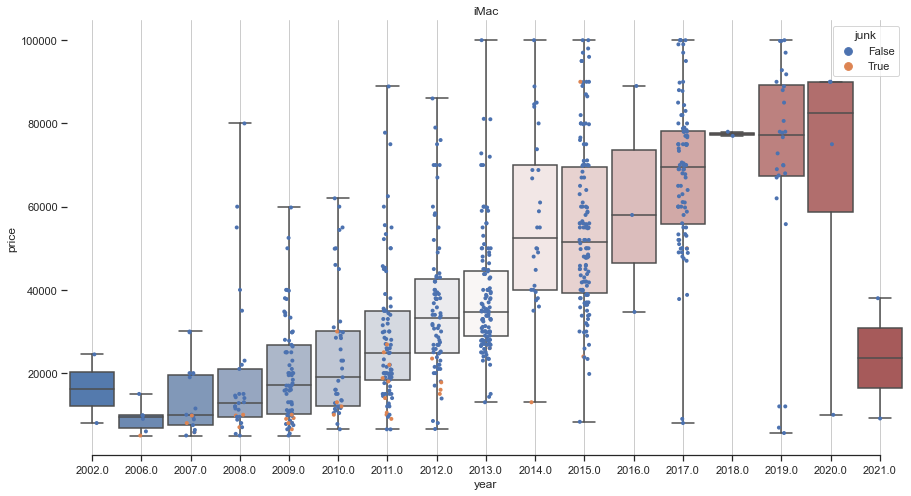

In [74]:
ax = plt.subplots(figsize=(15, 8))
ax = sns.boxplot(x="year", y="price", data=df,
            whis=[0, 100], width=.9, palette="vlag")

sns.stripplot(x="year", y="price", data=df, hue="junk",
              size=4, linewidth=0)

ax.xaxis.grid(True)
sns.despine(trim=True, left=True)
plt.title("iMac")
